In [43]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats as stats
import time

## Question 1: Generating mandelbrot set



In [24]:
def mandelbrot(dx , nmax , xbounds=(-2.25 , 1), ybounds= (-1.5,1.5)):
    x1, x2 = xbounds
    y1, y2 = ybounds
    xs = np.arange(x1, x2 + dx, dx)
    ys = np.arange(y1, y2 + dx, dx)
    coordinates = [(x,y) for x in xs for y in ys]
    mandelbrot = []
  
    for coordinate in coordinates:
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        term = (c.real, c.imag , height) 
        mandelbrot.append(term)

    return np.array(mandelbrot)

    

 #### Visualizing

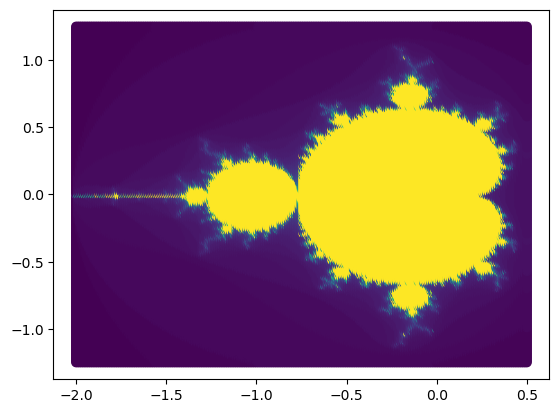

In [25]:

dx = 0.01
xrange = (-2, 0.5)
yrange = (-1.25,1.25)
nmax = 100


#sety = mandelbrot( dx=dx ,nmax = nmax)
sety = mandelbrot(dx ,nmax, xrange, yrange)

x, y , c = sety[:, 0], sety[:, 1], sety[:,2]


plt.scatter(x,y, c=c)


## Question 2: Convergence


In [26]:
def MonteCarlo(iterations, samples, xlen, ylen):
    counter = 0
    sample_set = []
    for sample in range(samples):
        coordinate = [np.random.uniform(xlen[0], xlen[1]), np.random.uniform(ylen[0], ylen[1])]
        c = complex(coordinate[0], coordinate[1])
        zn_1 = 0
        height = 0
        for iteration in range(iterations):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        if height >= iterations: 
            counter += 1
        term = (c.real, c.imag , height) 
        sample_set.append(term)
    A_m = (counter / samples) * ((xlen[1]-xlen[0]) * (ylen[1]-ylen[0]))
    return A_m

Area = MonteCarlo(100, 10000, xrange, yrange)
print(Area)

1.5062499999999999


In [27]:
def Convergence(iteration_max, sample_size, xrange, yrange):
    Res = np.empty((iteration_max, 1))
    Data_final = MonteCarlo(iteration_max, 10_000, xrange, yrange) 
    for i in range(iteration_max):
        Integral_var = MonteCarlo(i, sample_size, xrange, yrange)
        Res[i] = abs(Integral_var - Data_final)
    return Res
    

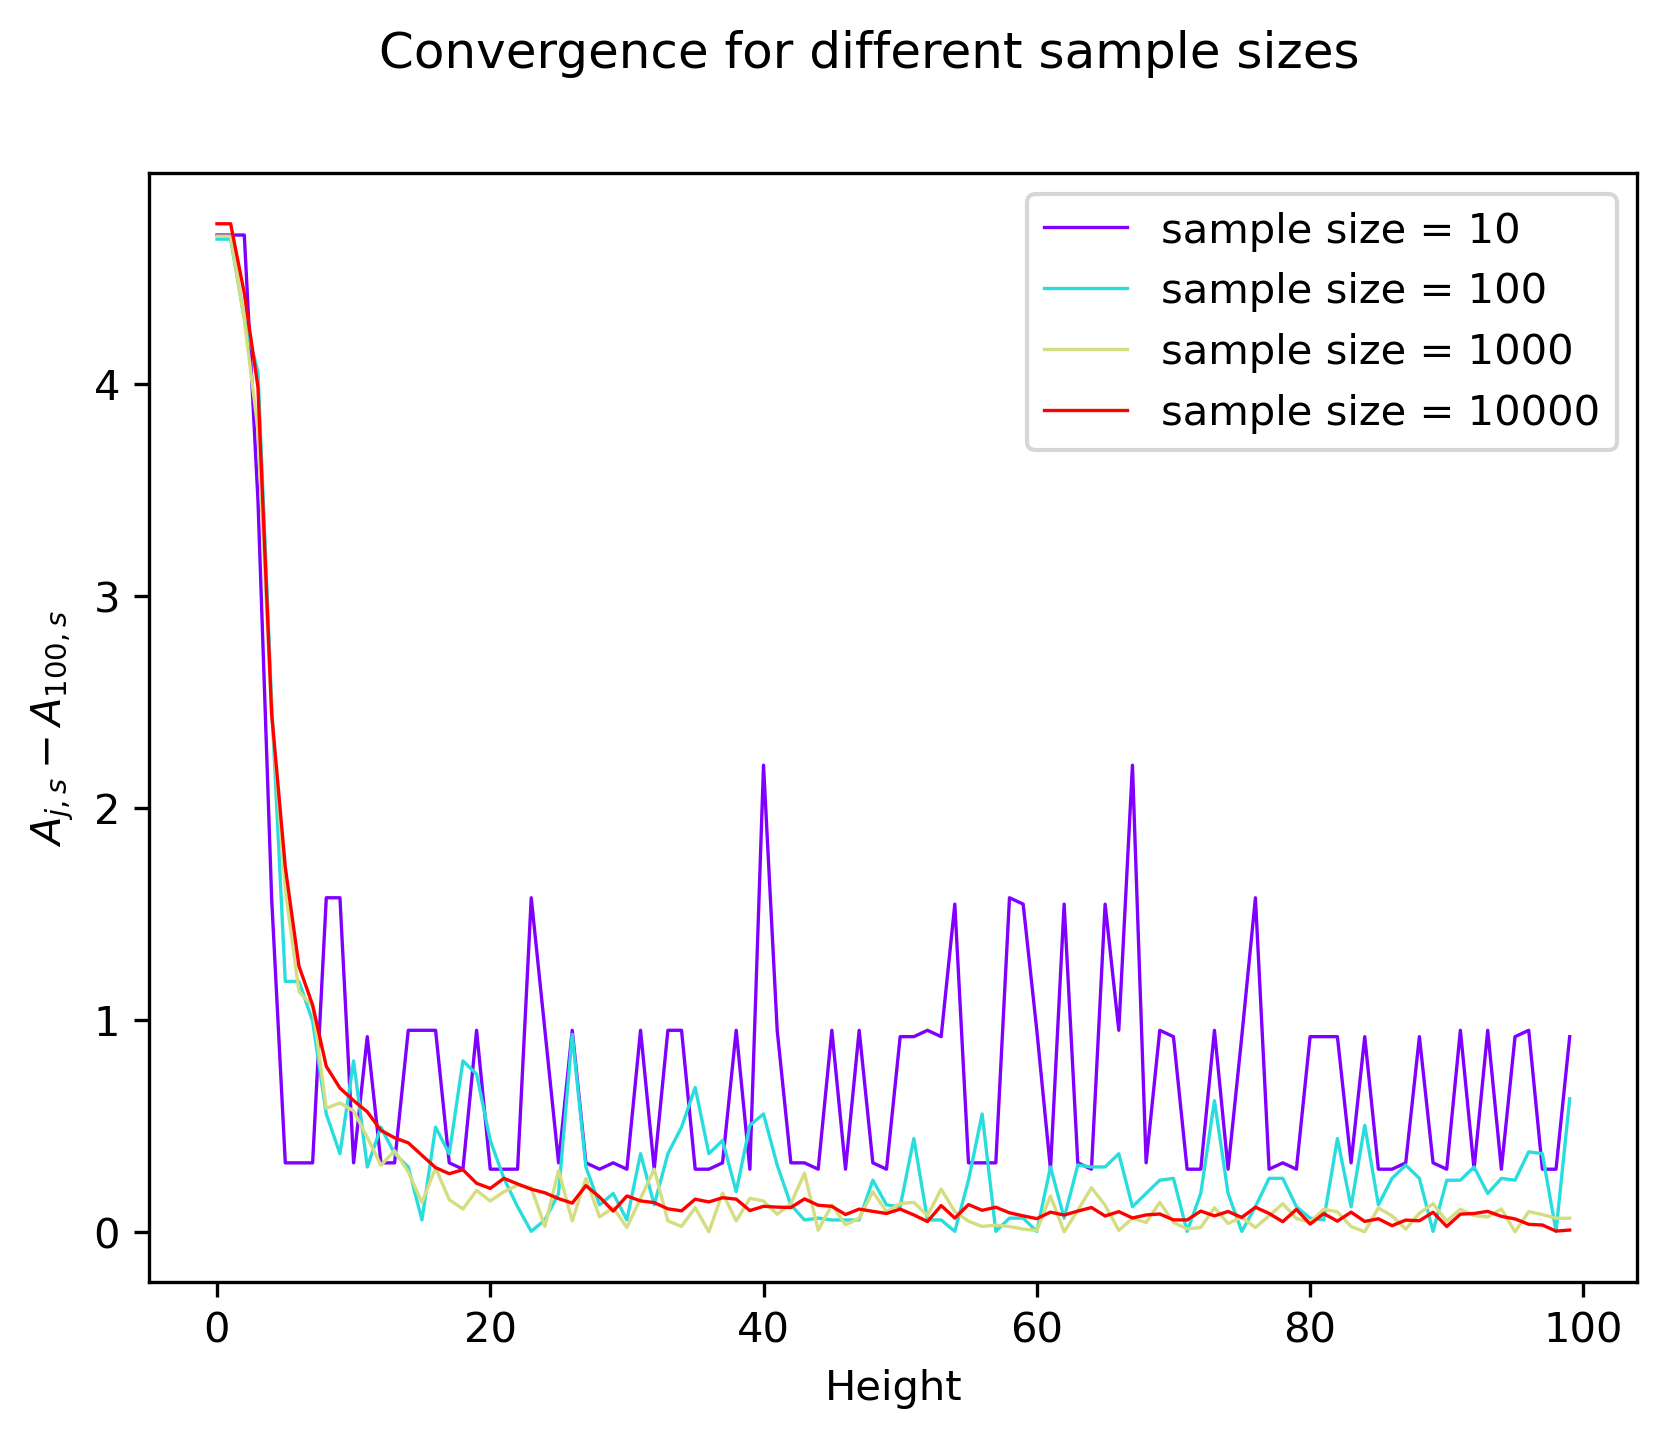

In [28]:
from matplotlib.pyplot import cm

iteration_max = 100
nsamples = [10, 100, 1000, 10000] 
sample_res = []

for s in nsamples:
    Convergence_res = Convergence(iteration_max, s, xrange, yrange)
    sample_res.append(Convergence_res)

# maybe take absolute values for convergence --> otherwise fluctuations
plt.figure(dpi = 300)
color = iter(cm.rainbow(np.linspace(0, 1, len(nsamples))))
for index in range(len(nsamples)):
    col = next(color)
    plt.plot(sample_res[index], c = col, linewidth = '0.8', label = 'sample size = {}'.format(nsamples[index]))
plt.legend()
plt.xlabel('Height')
plt.ylabel(r'$A_{j,s}-A_{100,s}$')
plt.suptitle('Convergence for different sample sizes')
plt.show()
plt.close()



In [29]:
def Confidence_interval(confidence, iterations_CI, iteration_integration, sample_size, xrange, yrange):
    Confidence_arr = []
    for iter_CI in range(iterations_CI):
        Integral = MonteCarlo(iteration_integration, sample_size, xrange, yrange)
        Confidence_arr.append(Integral)
    Mean = np.mean(Confidence_arr)
    S2 = []
    for iters in range(iterations_CI):
        S2.append((Confidence_arr[iters]-Mean)**2)
    s = np.sqrt((1/iterations_CI)*sum(S2))
    x_neg = Mean - ((confidence*s)/np.sqrt(iterations_CI))
    x_pos = Mean + ((confidence*s)/np.sqrt(iterations_CI))
    return [Mean, x_neg, x_pos]

Con = Confidence_interval(1.96, 50, 100, 10000, xrange, yrange)
print(Con)

[1.5404499999999999, 1.53233380116557, 1.5485661988344297]


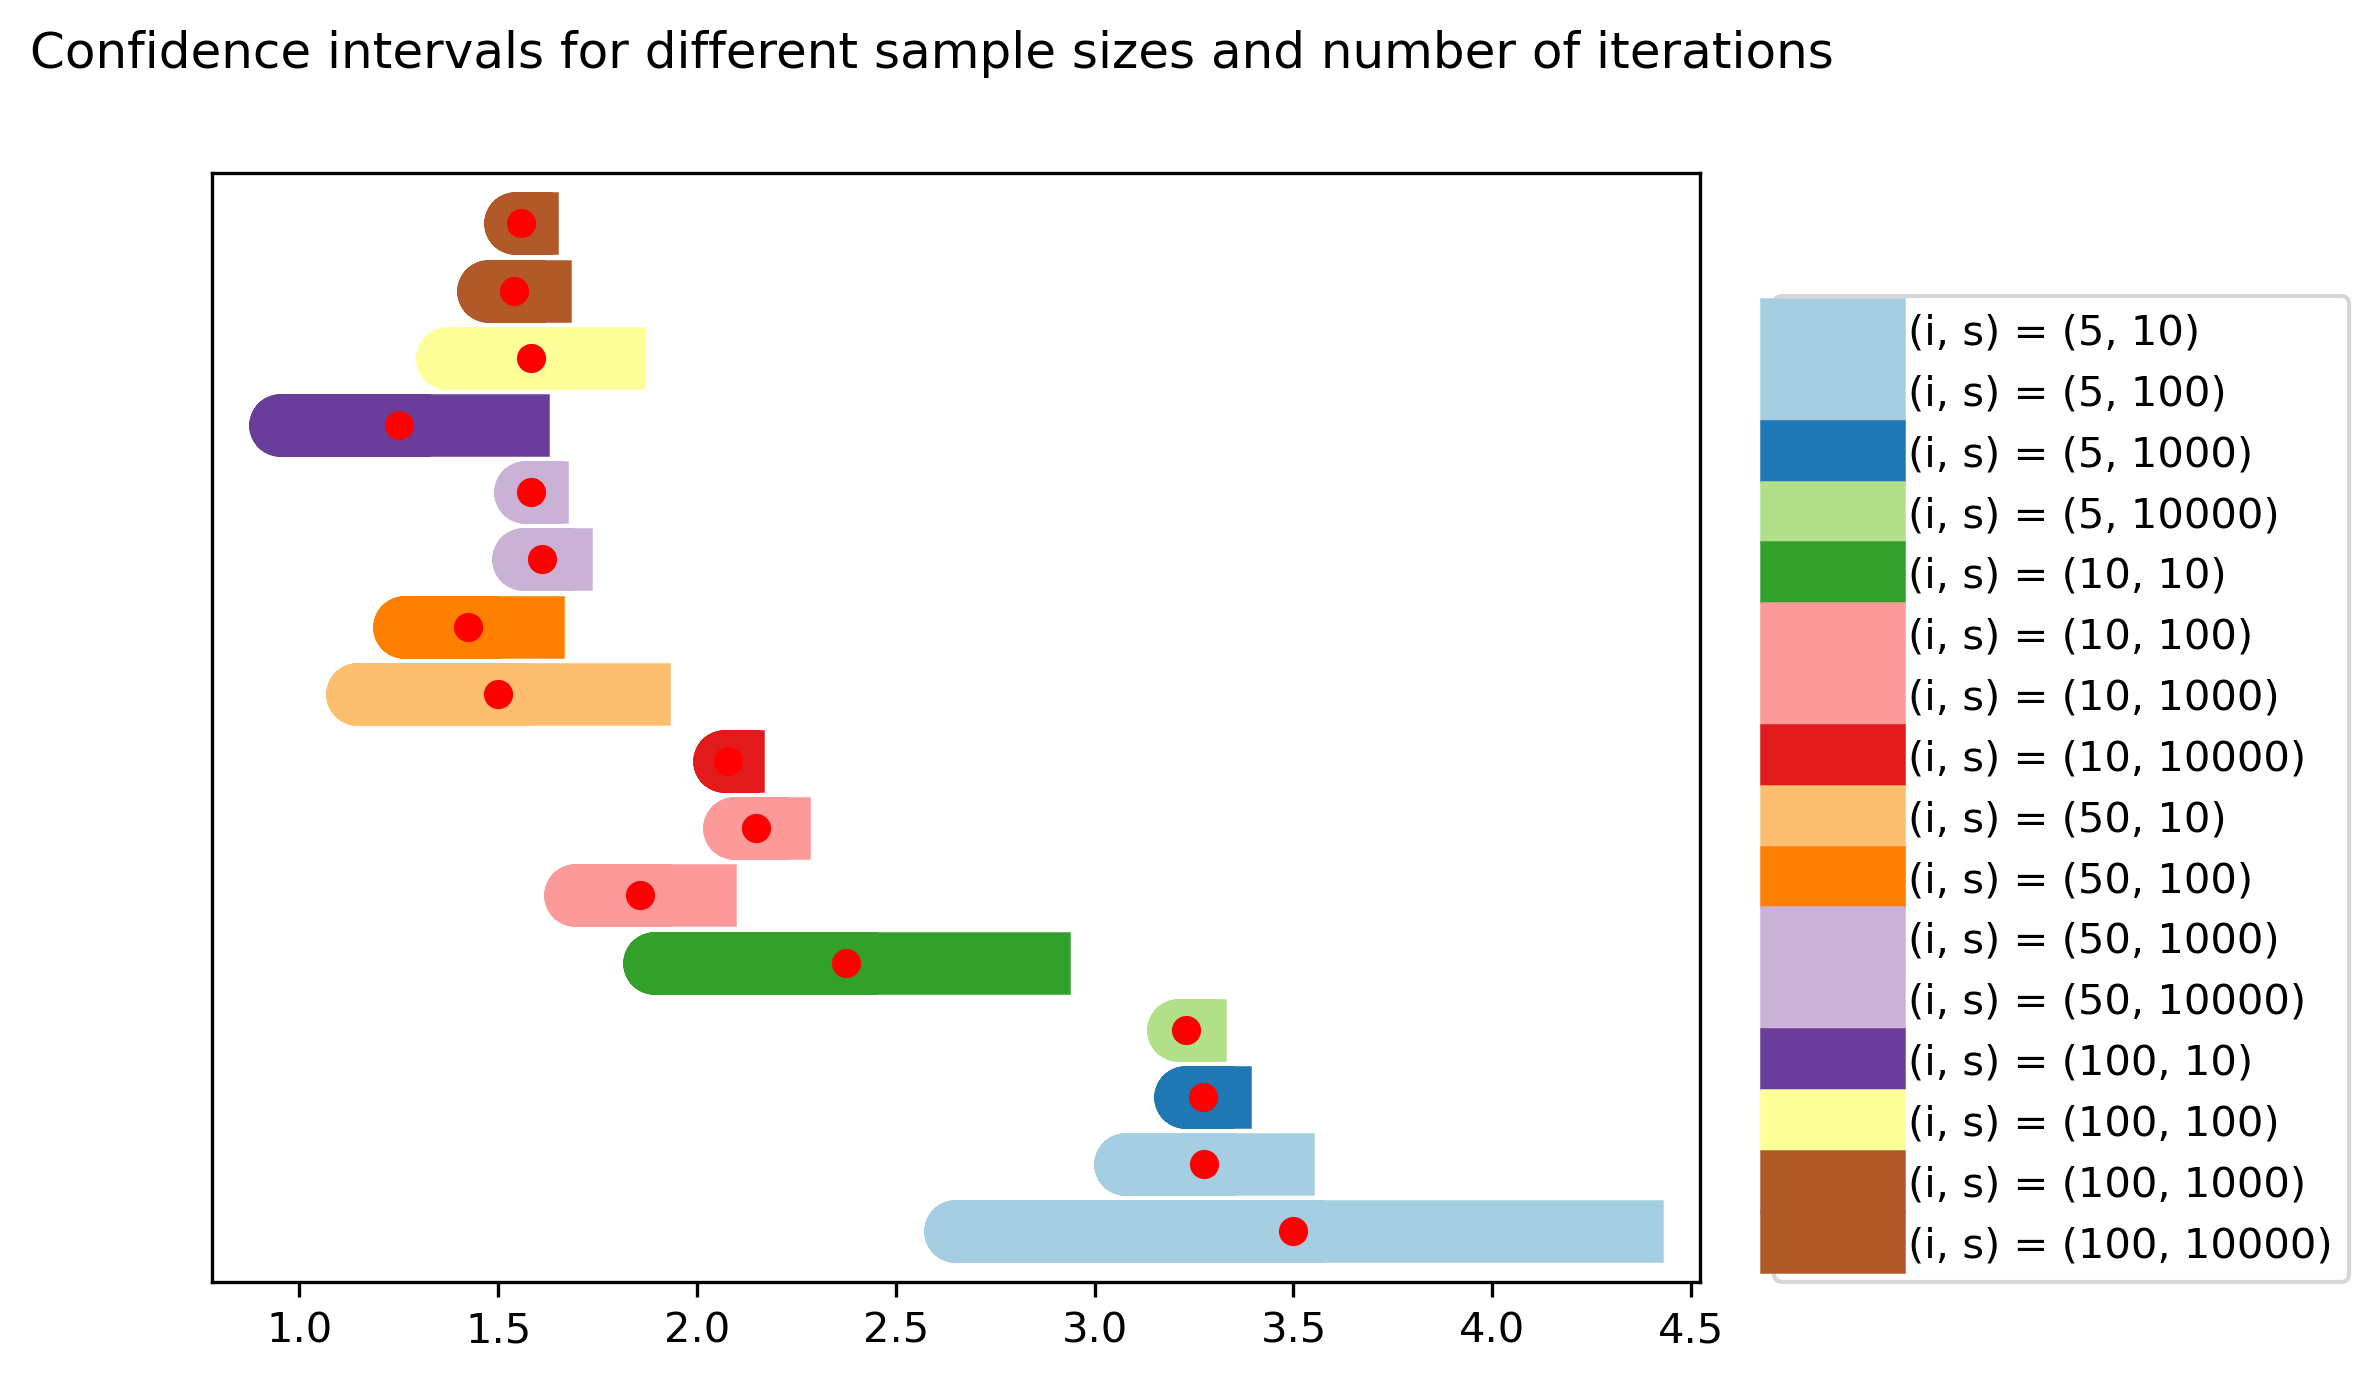

In [30]:
iterations_CI = 10
confidence = 1.96 # this equals a 95% confidence interval
sample_sizes = [10, 100, 1000, 10000]
niters = [5, 10, 50, 100]
Result_arr = []

for iters in niters:
    for samples in sample_sizes: 
        Interval = Confidence_interval(confidence, iterations_CI, iters, samples, xrange, yrange)
        length = Interval[2] - Interval[1]
        Result = [iters, samples, Interval[0], Interval[1], Interval[2], length]
        Result_arr.append(Result)
Array = Result_arr

def array_form(length):
    array_f = []
    for n in range(0,length):
        arr = [n/10000]*3
        array_f.append(arr)
    return np.array(array_f)

y = array_form(len(Array))
plt.figure(dpi = 300)
color = iter(cm.Paired(np.linspace(0, 1, len(Array))))
for i in range(len(Array)):
    col0 = next(color)
    Store = [Array[i][2], Array[i][3], Array[i][4]]
    y_ax = y[i,:]
    plt.scatter(Store[0], y_ax[0], color = 'r', zorder=2)
    plt.plot(Store, y_ax, c = col0, linewidth = '15', zorder=1, label = '(i, s) = {}'.format((Array[i][0], Array[i][1])))
plt.yticks([])
plt.legend(loc = (1.05, 0))
plt.suptitle('Confidence intervals for different sample sizes and number of iterations')
plt.show()
plt.close()

## Question 3: Comparison of different sampling techniques

### Latin hypercube sampling

In [31]:
#Latin hypercube sampling
    
def intervals(arr): #Returns a list of tuples for each interval of a list

    intervals = [] # A list of tuples containing each interval for the given range      
    for i in range(len(arr)):
        j = i +1
        if(j < len(arr)):
            interval = (arr[i],arr[j])
            intervals.append(interval)

    return intervals  

      
def shuffler(x,y): #Shuffles the position of the x and y intervals in their respective lists
 
      
      shuffled_x_intervals = random.sample(x, len(x))
      shuffled_y_intervals = random.sample(y, len(y))

      return[shuffled_x_intervals,shuffled_y_intervals]


def latin_hypercube_sample(n): #Returns a list of randomly sampled n complex numbers from each row of the grid


        xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
    
        yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

        x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

        y_intervals_list = intervals(yrange) #A list in which each element is one of the intervals in the y range
        
        #print("X INTERVALS")
        #print(x_intervals_list)
        ##print("Y INTERVALS")
        #print(y_intervals_list)
        
        shuffled_x_intervals, shuffled_y_intervals  = shuffler(x_intervals_list,y_intervals_list) #Shuffling the intervals of both lists
        
        random_x_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled x intervals
        random_y_list = [] #A list of random numbers chosen uniformly from each interval of the shuffled y intervals

        for interval in shuffled_x_intervals:
                
                random_x = random.uniform(interval[0],interval[1])
                random_x_list.append(random_x)


        for interval in shuffled_y_intervals:

                random_y = random.uniform(interval[0],interval[1])
                random_y_list.append(random_y)

        
        coordinates = list(zip(random_x_list, random_y_list))  
        

        random_complex_numbers = []

        for coordinate in coordinates:
                c = complex(coordinate[0], coordinate[1])
                random_complex_numbers.append(c)
                

        

        return[random_complex_numbers]



### Orthogonal sampling

In [32]:
#Orthogonal sampling

def orthogonal_shuffler(x,y,n): #Shuffles the position of the x and y intervals in a quadrant
      
            
            shuffled_x_intervals = random.sample(x, n) #We only draw n intervals, where n is the number of values we want to pick from each quadrant
            shuffled_y_intervals = random.sample(y, n)

            return[shuffled_x_intervals,shuffled_y_intervals]

def orthogonal_sampling(n):

      samples_per_quadrant = int(n/4) #Working out the nunber of samples per quadrant 

      xrange = np.linspace(-2,0.5,n+1) #x range in grid, with step n+1
      
      yrange = np.linspace(-1.25,1.25,n+1) #y range in grid, with step n+1

      x_intervals_list = intervals(xrange) #A list in which each element is one of the intervals in the x range

      y_intervals_list = intervals(yrange)#A list in which each element is one of the intervals in the y range

      midpoint = int(len(x_intervals_list)/2) #Both x and y lists have the same length, and hence the same mid point
      x_halves = [[x_intervals_list[:midpoint]],[x_intervals_list[midpoint:]]] #slicing the x intervals in half
      y_halves = [[y_intervals_list[:midpoint]],[y_intervals_list[midpoint:]]] #Slicing the y intervals in half

      quadrant1 = [x_halves[0],y_halves[0]] #Bottom left square
      quadrant2 = [x_halves[0],y_halves[1]] #Top left square
      quadrant3 = [x_halves[1],y_halves[0]] #Bottom right square
      quadrant4 = [x_halves[1],y_halves[1]] #Top right square

      quadrants = [quadrant1,quadrant2,quadrant3,quadrant4]

      orthogonal_sample = [] #Stores all the complex numbers for the Orthogonal sample
      x_interval_bin = [] #A list that stores previously used x intervals so that values in these intervals can't be selected in other quadrants
      y_interval_bin = [] #A list that stores previously used y intervals so that values in these intervals can't be selected in other quadrants



      for quadrant in quadrants:
      
            x_intervals = quadrant[0][0] #Extracting the x intervals of this quadrant
            y_intervals = quadrant[1][0] #Extracting the y intervals of this quadrant

            x_intervals = [x for x in x_intervals if x not in x_interval_bin]
            y_intervals = [y for y in y_intervals if y not in y_interval_bin]    
                        
            #print(x_intervals)
            shuffled_x_intervals, shuffled_y_intervals  = orthogonal_shuffler(x_intervals,y_intervals,samples_per_quadrant) #Shuffling the x and y intervals of this quadrant 
            random_x_list = []
            random_y_list = []

            #print(shuffled_x_intervals)
            

            for interval in shuffled_x_intervals:
                  
                        x_interval_bin.append(interval) #Add these x intervals to the bin, we don't want to use them again

                        random_x = random.uniform(interval[0],interval[1])
                        random_x_list.append(random_x)

            for interval in shuffled_y_intervals:

                        y_interval_bin.append(interval) #Add these y intervals to the bin, we don't want to use them again
                        random_y = random.uniform(interval[0],interval[1])
                        random_y_list.append(random_y)

            #print("x BIN")
            #print(x_interval_bin)
            #print("y bin")
            #print(y_interval_bin)
            coordinates = list(zip(random_x_list, random_y_list))  
                  

            for coordinate in coordinates:
                        c = complex(coordinate[0], coordinate[1])
                        orthogonal_sample.append(c)
                        
      return [orthogonal_sample]


### Confidence Intervals for different sampling methods

In [33]:
#METHODS REQUIRED TO GENERATE MULTIPLE AREA ESTIMATES

def calculate_heights(complex_numbers):
    
    heights = []

    for number in complex_numbers:
        c = number
        zn_1 = 0
        height = 0
        
        for iteration in range(nmax):
            height += 1
            zn  = (zn_1**2) + c
            if abs(zn) > 2:
                break
            zn_1 = zn
        heights.append(height)
        
    return heights
        
    
def calculate_area(heights):

    counter = 0
    for height in heights:
        Random_Point = height
        if Random_Point >= nmax:
            counter = counter + 1
    A_m = (counter / len(heights)) * (2.5) * 2.5

    return A_m

    



In [34]:
#Generate multiple areas using latin sampling

areas_latin_b_sample = [] #A list of areas calculated using a big sample
areas_latin_s_sample = [] #A list of areas calculated using a small sample


for i in range(100):

    latin_list_b = latin_hypercube_sample(1000)
    latin_list_s = latin_hypercube_sample(100)

    heights_b = calculate_heights(latin_list_b[0])
    heights_s = calculate_heights(latin_list_s[0])


    area_b = calculate_area(heights_b)
    area_s = calculate_area(heights_s)

    areas_latin_b_sample.append(area_b)
    areas_latin_s_sample.append(area_s)

print("USING BIG SAMPLE")
print(areas_latin_b_sample)
print("USING SMALL SAMPLE")
print(areas_latin_s_sample)

USING BIG SAMPLE
[1.4874999999999998, 1.50625, 1.5375, 1.49375, 1.55, 1.6062500000000002, 1.5875, 1.4687499999999998, 1.44375, 1.43125, 1.49375, 1.53125, 1.5437499999999997, 1.49375, 1.49375, 1.575, 1.5875, 1.4812500000000002, 1.575, 1.5687499999999999, 1.5687499999999999, 1.5187499999999998, 1.5625, 1.5375, 1.55, 1.55, 1.61875, 1.4375000000000002, 1.40625, 1.53125, 1.6875, 1.575, 1.50625, 1.5437499999999997, 1.5, 1.5, 1.5187499999999998, 1.525, 1.4500000000000002, 1.44375, 1.5687499999999999, 1.5375, 1.5375, 1.625, 1.5562500000000001, 1.59375, 1.5562500000000001, 1.4874999999999998, 1.59375, 1.5187499999999998, 1.5437499999999997, 1.50625, 1.5375, 1.5562500000000001, 1.5812500000000003, 1.625, 1.5437499999999997, 1.44375, 1.4625000000000001, 1.5187499999999998, 1.5437499999999997, 1.625, 1.5375, 1.50625, 1.5812500000000003, 1.53125, 1.5687499999999999, 1.6375000000000002, 1.5187499999999998, 1.6, 1.6625, 1.5625, 1.5812500000000003, 1.525, 1.50625, 1.625, 1.5125, 1.4812500000000002, 1.

In [35]:
#Generate multiple areas using orthogonal sampling
areas_orthogonal_b_sample = [] #A list of areas calculated using a big sample
areas_orthogonal_s_sample = [] #A list of areas calculated using a small sample

for i in range(100):
    
    orthogonal_list_b = orthogonal_sampling(1000)
    orthogonal_list_s = orthogonal_sampling(100)

    heights_b = calculate_heights(orthogonal_list_b[0])
    heights_s = calculate_heights(orthogonal_list_s[0])


    area_b = calculate_area(heights_b)
    area_s = calculate_area(heights_s)

    areas_orthogonal_b_sample.append(area_b)
    areas_orthogonal_s_sample.append(area_s)

print("USING BIG SAMPLE")
print(areas_orthogonal_b_sample)
print("USING SMALL SAMPLE")
print(areas_orthogonal_s_sample)



USING BIG SAMPLE
[1.5562500000000001, 1.5375, 1.5812500000000003, 1.49375, 1.63125, 1.4687499999999998, 1.5375, 1.575, 1.5562500000000001, 1.55, 1.5125, 1.5125, 1.5187499999999998, 1.525, 1.4625000000000001, 1.5812500000000003, 1.5, 1.4250000000000003, 1.5687499999999999, 1.5, 1.50625, 1.4250000000000003, 1.5625, 1.625, 1.4874999999999998, 1.53125, 1.61875, 1.5187499999999998, 1.55, 1.55, 1.5437499999999997, 1.4625000000000001, 1.5875, 1.5562500000000001, 1.5187499999999998, 1.575, 1.525, 1.5187499999999998, 1.50625, 1.49375, 1.4749999999999999, 1.6, 1.4812500000000002, 1.4812500000000002, 1.55, 1.5187499999999998, 1.5562500000000001, 1.5562500000000001, 1.525, 1.5125, 1.6062500000000002, 1.5437499999999997, 1.5625, 1.6125, 1.4812500000000002, 1.6062500000000002, 1.55, 1.5375, 1.5437499999999997, 1.59375, 1.5625, 1.55, 1.5625, 1.5375, 1.6125, 1.525, 1.4687499999999998, 1.5625, 1.6375000000000002, 1.5187499999999998, 1.6062500000000002, 1.6125, 1.4687499999999998, 1.49375, 1.49375, 1.58

In [37]:
#Generate multiple areas using pure random sampling 

areas_pure_b_sample = []  #A list of areas calculated using a big sample
areas_pure_s_sample = []  #A list of areas calculated using a small sample

for i in range(100):

    area_b = MonteCarlo(100, 1000, xrange, yrange)
    area_s = MonteCarlo(100, 100, xrange, yrange)

    #area_b = pure_sampling(data_set,nmax, 1000, xrange, yrange)
    #area_s = pure_sampling(data_set,nmax, 100, xrange, yrange)

    areas_pure_b_sample.append(area_b)
    areas_pure_s_sample.append(area_s)


print("USING BIG SAMPLE")
print(areas_pure_b_sample)
print("USING SMALL SAMPLE")
print(areas_pure_s_sample)


USING BIG SAMPLE
[1.6375000000000002, 1.575, 1.5062499999999999, 1.4500000000000002, 1.44375, 1.425, 1.49375, 1.5, 1.4500000000000002, 1.6812500000000001, 1.63125, 1.675, 1.5875, 1.5125, 1.725, 1.525, 1.4125, 1.5, 1.56875, 1.5, 1.56875, 1.60625, 1.55625, 1.675, 1.5375, 1.60625, 1.40625, 1.58125, 1.5375, 1.5125, 1.63125, 1.4312500000000001, 1.64375, 1.51875, 1.5875, 1.51875, 1.5, 1.5375, 1.6, 1.59375, 1.6125, 1.525, 1.5, 1.4500000000000002, 1.5125, 1.53125, 1.40625, 1.60625, 1.59375, 1.48125, 1.5125, 1.5125, 1.525, 1.44375, 1.6125, 1.58125, 1.3875, 1.59375, 1.6187500000000001, 1.6, 1.59375, 1.46875, 1.625, 1.525, 1.6375000000000002, 1.65625, 1.51875, 1.54375, 1.525, 1.3625, 1.46875, 1.725, 1.5375, 1.45625, 1.56875, 1.60625, 1.6187500000000001, 1.49375, 1.55, 1.5625, 1.7437500000000001, 1.56875, 1.6625, 1.4874999999999998, 1.55625, 1.55, 1.33125, 1.5125, 1.60625, 1.6812500000000001, 1.64375, 1.575, 1.56875, 1.3375, 1.8187499999999999, 1.6500000000000001, 1.59375, 1.5125, 1.5, 1.700000000

In [38]:
#Confidence intervals

def confidence_intervals(data):
    
    mean = np.mean(data)
    std = np.std(data, ddof= 1)

    #Sample size
    n = len(data)

    confidence_level = 0.95
    significance_level = 1 - confidence_level
    z = stats.norm.ppf(1-significance_level/2)

    margin_of_error = z * (std/np.sqrt(n))

    confidence_interval = [mean - margin_of_error, mean + margin_of_error]

    return confidence_interval



Pure SAMPLING CI
[1.4347757783964534, 1.5402242216035467]
LATIN SAMPLING CI
[1.5064182814322122, 1.5760817185677878]
ORTHOGONAL SAMPLING CI
[1.5025237780720255, 1.5587262219279743]


([], [])

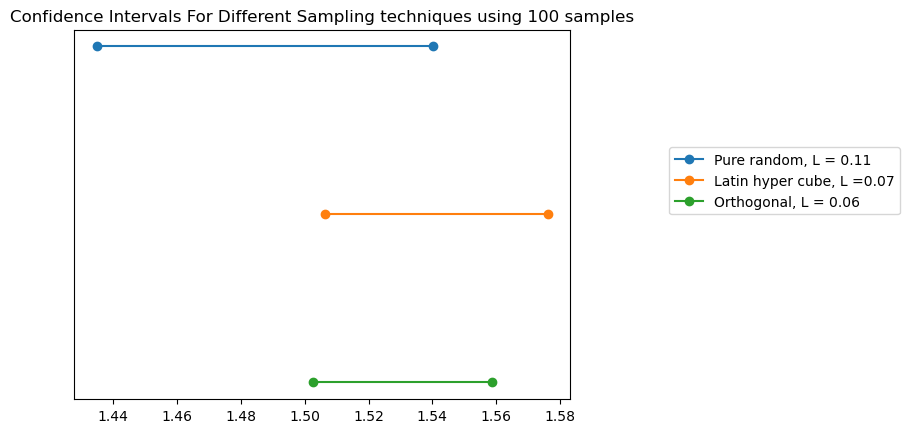

In [56]:
#Confidence intervals for sampling methods with small samples

print("Pure SAMPLING CI")
confidence_interval_pure = confidence_intervals(areas_pure_s_sample)
length_pure = confidence_interval_pure[1] - confidence_interval_pure[0]
print(confidence_interval_pure)

print("LATIN SAMPLING CI") 

confidence_interval_latin = confidence_intervals(areas_latin_s_sample)
length_latin = confidence_interval_latin[1] - confidence_interval_latin[0]
print(confidence_interval_latin)

print("ORTHOGONAL SAMPLING CI")
confidence_interval_orthogonal = confidence_intervals(areas_orthogonal_s_sample)
length_orthogonal = confidence_interval_orthogonal[1] - confidence_interval_orthogonal[0]
print(confidence_interval_orthogonal)

plt.plot(confidence_interval_pure,[3,3], label = "Pure random, L = " +str(round(length_pure, 2)), marker='o')
plt.plot(confidence_interval_latin,[2,2], label = "Latin hyper cube, L =" +str(round(length_latin, 2)), marker='o')
plt.plot(confidence_interval_orthogonal,[1,1], label = "Orthogonal, L = " +str(round(length_orthogonal, 2)), marker='o')


plt.title("Confidence Intervals For Different Sampling techniques using 100 samples")

plt.legend(loc=(1.2, 0.5))

plt.yticks([])  # Hide y-axis tick labels as well

Pure SAMPLING CI
[1.5347367839267474, 1.5692632160732523]
LATIN SAMPLING CI
[1.5318060849524326, 1.5526939150475672]
ORTHOGONAL SAMPLING CI
[1.5288669344359394, 1.5476330655640609]


([], [])

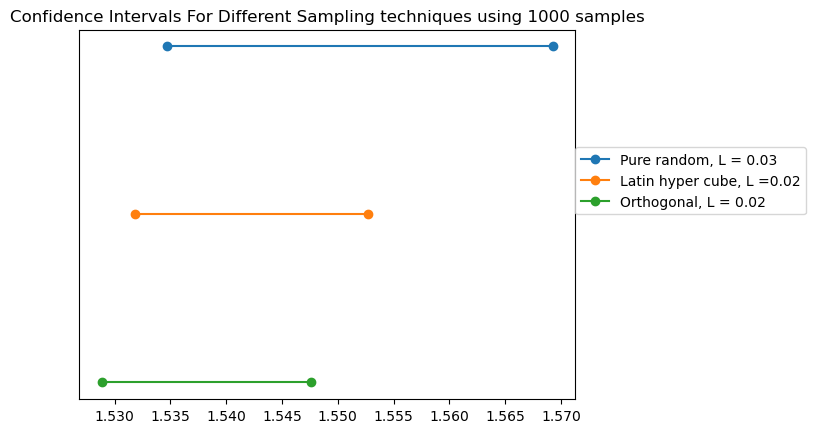

In [40]:

print("Pure SAMPLING CI")
confidence_interval_pure = confidence_intervals(areas_pure_b_sample)
length_pure = confidence_interval_pure[1] - confidence_interval_pure[0]
print(confidence_interval_pure)

print("LATIN SAMPLING CI") 

confidence_interval_latin = confidence_intervals(areas_latin_b_sample)
length_latin = confidence_interval_latin[1] - confidence_interval_latin[0]
print(confidence_interval_latin)

print("ORTHOGONAL SAMPLING CI")
confidence_interval_orthogonal = confidence_intervals(areas_orthogonal_b_sample)
length_orthogonal = confidence_interval_orthogonal[1] - confidence_interval_orthogonal[0]
print(confidence_interval_orthogonal)

plt.plot(confidence_interval_pure,[3,3], label = "Pure random, L = " +str(round(length_pure, 2)), marker='o')
plt.plot(confidence_interval_latin,[2,2], label = "Latin hyper cube, L =" +str(round(length_latin, 2)), marker='o')
plt.plot(confidence_interval_orthogonal,[1,1], label = "Orthogonal, L = " +str(round(length_orthogonal, 2)), marker='o')

plt.title("Confidence Intervals For Different Sampling techniques using 1000 samples")


plt.legend(loc=(1, 0.5))

plt.yticks([])  # Hide y-axis tick labels as well

# Question 4. Improved convergence method

We first split the space into smaller spaces so they fit the montecarlo set better


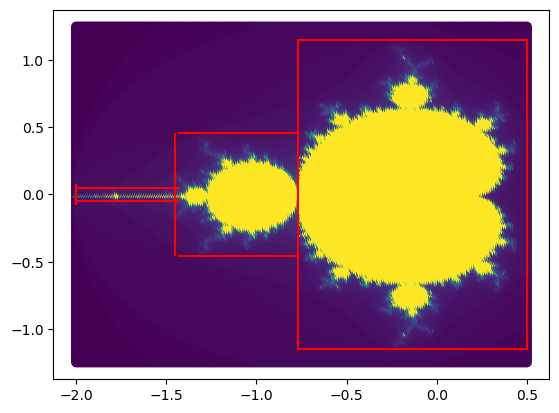

In [54]:
samples = mandelbrot(dx ,nmax, xrange, yrange)
x, y , c = samples[:, 0], samples[:, 1], samples[:,2]

xbounds = [(-2, -1.43),(-1.43,-0.77),(-0.77,0.5)]
ybounds = [(-0.08, 0.08),(-0.46, 0.46),(-1.15, 1.15)]

# plt.figure(figsize=(9, 7)) 
plt.scatter(x,y, c=c)

# Vertical Lines
plt.vlines(x=-2, ymin=ybounds[0][0], ymax=ybounds[0][1], color='r', label='Vertical Line from 1 to 3 at x=3')
plt.vlines(x=-1.45, ymin=ybounds[1][0], ymax=ybounds[1][1], color='r', label='Vertical Line from 1 to 3 at x=3')
plt.vlines(x=-0.77, ymin=ybounds[2][0], ymax=ybounds[2][1], color='r',  label='Vertical Line from 1 to 3 at x=3')
plt.vlines(x=0.5, ymin=ybounds[2][0], ymax=ybounds[2][1], color='r',  label='Vertical Line from 1 to 3 at x=3')

# Horizontal lines 1
plt.plot(xbounds[0], (0.05,0.05), color ='r')
plt.plot(xbounds[0], (-0.05,-0.05), color ='r')

plt.plot(xbounds[1], (0.46, 0.46), color ='r')
plt.plot(xbounds[1], (-0.46, -0.46), color ='r')

plt.plot(xbounds[2], (1.15, 1.15), color ='r')
plt.plot(xbounds[2], (-1.15, -1.15), color ='r')

plt.savefig('mandelbrot_many_boxes.png')

### Define modified grid montecarlo

In [41]:
def montecarlo_improved(iterations, sample,xbounds, ybounds, dx=0.01):
    '''Runs with improved bounds for montecarlo'''
    A = 0
    if len(xbounds) != len(ybounds):
        raise ValueError('Length of xbounds and ybounds is unequal')
    for k in range(len(xbounds)):
        xlen , ylen = xbounds[k], ybounds[k]
        A += MonteCarlo(iterations, sample, xlen, ylen)
    return A
    

In [42]:
xrange = (-2, 0.5)
yrange = (-1.25,1.25)

xbounds = [(-2, -1.43),(-1.43,-0.77),(-0.77,0.5)]
ybounds = [(-0.08, 0.08),(-0.46, 0.46),(-1.15, 1.15)]

A1 = MonteCarlo(1000, 10000, xrange, yrange) 
A2 = montecarlo_improved(1000, 10000, xbounds, ybounds)




print(A1)
print(A2)

1.535625
1.53798368


In [44]:
print(time.strftime('%X %x %Z'))

A1 = np.array([MonteCarlo(100, 1000, xrange, yrange) for k in range(10000)])
A2 = np.array([montecarlo_improved(100, 1000, xbounds, ybounds) for k in range(10000)])

print(time.strftime('%X %x %Z'))

18:37:57 11/17/23 CET
18:40:46 11/17/23 CET


Text(0.5, 1.0, 'Random sampling enhanced')

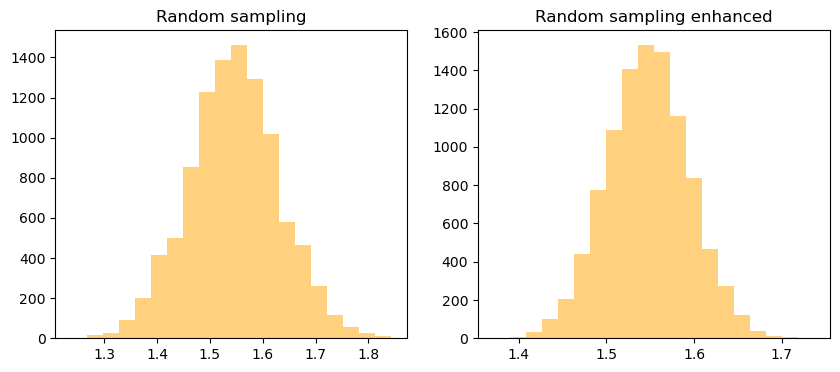

In [45]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram in the first subplot
ax1.hist(A1, bins=20, alpha=0.5, color='orange', label='Histogram 1')
ax1.set_title('Random sampling')

# Plot the second histogram in the second subplot
ax2.hist(A2, bins=20, alpha=0.5, color='orange', label='Histogram 2')
ax2.set_title('Random sampling enhanced')

In [46]:
print(np.mean(A1))
print(np.mean(A2)/1.5025)

print(np.std(A1))
print(np.std(A2))

1.5464793749999999
1.029725619327787
0.08566677655812303
0.04670941113228429


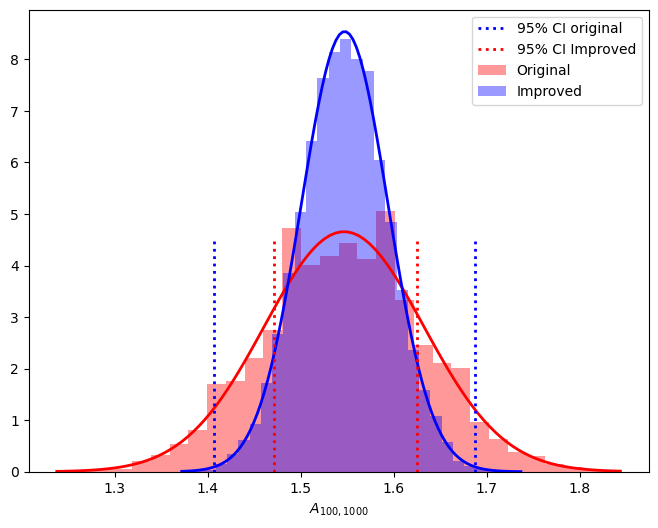

In [47]:
# plt.figure(dpi = 200)

plt.figure(figsize=(8, 6))  

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(A1)

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(min(A1), max(A1), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'r', linewidth=2)

# Fit a normal distribution to the data:
mu, std = stats.norm.fit(A2)

# Plot the PDF.
# xmin, xmax = plt.xlim()
x = np.linspace(min(A2), max(A2), 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'b', linewidth=2)

# Add the CI-lines:
ymin, ymax = plt.ylim()

original_ci_lower = np.percentile(A1, 5)
original_ci_upper = np.percentile(A1, 95)

enchanced_ci_lower = np.percentile(A2, 5)
enchanced_ci_upper = np.percentile(A2, 95)

plt.plot([original_ci_lower, original_ci_lower], [0, ymax*0.5], 'b:', lw=2, label='95% CI original')
plt.plot([original_ci_upper, original_ci_upper], [0, ymax*0.5], 'b:', lw=2)

plt.plot([enchanced_ci_lower, enchanced_ci_lower], [0, ymax*0.5], 'r:', lw=2, label='95% CI Improved')
plt.plot([enchanced_ci_upper, enchanced_ci_upper], [0, ymax*0.5], 'r:', lw=2)

# Plotting histograms
plt.hist(A1, label="Original", bins = 30, alpha = 0.4, density=1, color = 'red')

plt.hist(A2, label="Improved", bins = 30, alpha = 0.4, density=1, color= 'blue')


plt.xlabel('$A_{100,1000}$')
plt.savefig('improved_convergence_histogram.png')
plt.legend()
plt.savefig('improved_convergence_histogram.png')
plt.show()




Using this link : https://link.springer.com/article/10.1007/s11071-015-1917-4


Area roughly approximates $A_m = 1.5025$


In [48]:
Amax = 1.5025

print(time.strftime('%X %x %Z'))
A_original = abs(np.array([MonteCarlo(k, 10000, xrange, yrange) for k in range(1,101)]) - Amax)
A_new = abs(np.array([montecarlo_improved(k, 10000, xbounds, ybounds) for k in range(1,101)]) - Amax)
print(time.strftime('%X %x %Z'))

18:45:45 11/17/23 CET
18:45:59 11/17/23 CET


In [49]:
Amax = 1.5025

print(time.strftime('%X %x %Z'))
A_original = []
A_new = []

for sn in [100,1000,10000]:
    A_original.append(abs(np.array([MonteCarlo(k, sn, xrange, yrange) for k in range(1,101)]) - Amax))
    A_new.append(abs(np.array([montecarlo_improved(k, sn, xbounds, ybounds) for k in range(1,101)]) - Amax))

print(time.strftime('%X %x %Z'))

18:46:13 11/17/23 CET
18:46:28 11/17/23 CET


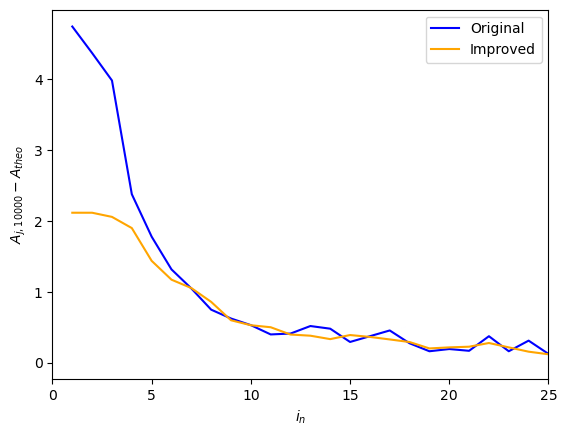

In [51]:
original = A_original[1]
improved = A_new[1]
plt.plot(i_s, original, color = 'blue', label = 'Original')
plt.plot(i_s, improved,color = 'orange', label = 'Improved')
plt.xlim(0, 25)
plt.legend()
plt.xlabel('$i_n$')
plt.ylabel(r'$A_{j,10000}-A_{theo}$')

plt.savefig('convergence_comparison.png')
plt.show()